In [98]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

### SGD vs Adam Comparison
Using a dummy dataset, we will do a simple linear regression, comparing between normal SGD and Adam optimization.

(Some of the code and content is taken from https://github.com/llSourcell/The_evolution_of_gradient_descent/blob/master/GD_vs_SGD.ipynb)

In [90]:
data = np.loadtxt('data.txt', delimiter=',')
x = data[:, 0]
y = data[:, 1]

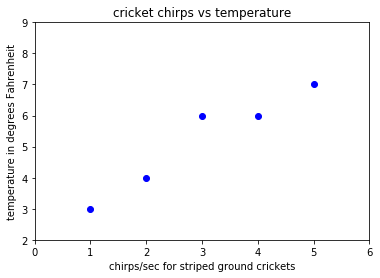

In [91]:
plt.scatter(data[:, 0], data[:, 1], marker='o', c='b')
plt.title('cricket chirps vs temperature')
plt.xlabel('chirps/sec for striped ground crickets')
plt.ylabel('temperature in degrees Fahrenheit')
plt.xlim([0,6])
plt.ylim([2,9])
plt.show()

Our goal is to find the equation of the straight line $h_\theta(x) = \theta_0 + \theta_1 x$ that best fits our data points. The function that we are trying to minimize in this case is: (what we'll call the Cost Function)

$J(\theta_0,\theta_1) = {1 \over 2m} \sum\limits_{i=1}^m (h_\theta(x_i)-y_i)^2$

In this case, our gradient will be defined in two dimensions:

$\frac{\partial}{\partial \theta_0} J(\theta_0,\theta_1) = \frac{1}{m}  \sum\limits_{i=1}^m (h_\theta(x_i)-y_i)$

$\frac{\partial}{\partial \theta_1} J(\theta_0,\theta_1) = \frac{1}{m}  \sum\limits_{i=1}^m ((h_\theta(x_i)-y_i) \cdot x_i)$

However, instead of doing batch gradient descent, we will be doing stochastic gradient descent. Hence the gradient is defined without doing any summation across all the training examples, but per example:

In [126]:
# the function we are optimizing
h = lambda theta_0, theta_1, x: theta_0 + theta_1*x

# the cost function.
def J(x, y, theta_0, theta_1):
    m = len(x)
    returnValue = 0
    for i in range(m):
        returnValue += (h(theta_0, theta_1, x[i]) - y[i])**2
    returnValue = returnValue/(2*m)
    return returnValue

# finding the gradient per each training example
def grad_J(x, y, theta_0, theta_1):
    returnValue = np.array([0., 0.])
    returnValue[0] += (h(theta_0, theta_1, x) - y)
    returnValue[1] += (h(theta_0, theta_1, x) - y)*x
    return returnValue

### Our Adam Optimizer
Below is our Adam Optimizer class for our use later in gradient descent. It is made with reference to https://arxiv.org/pdf/1412.6980v8.pdf.

In [93]:
class AdamOptimizer:
    def __init__(self, weights, alpha=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.alpha = alpha
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.m = 0
        self.v = 0
        self.t = 0
        self.theta = weights
        
    def backward_pass(self, gradient):
        self.t = self.t + 1
        self.m = self.beta1*self.m + (1 - self.beta1)*gradient
        self.v = self.beta2*self.v + (1 - self.beta2)*(gradient**2)
        m_hat = self.m/(1 - self.beta1**self.t)
        v_hat = self.v/(1 - self.beta2**self.t)
        self.theta = self.theta - self.alpha*(m_hat/(np.sqrt(v_hat) - self.epsilon))
        return self.theta

### Using Adam Optimization

In [143]:
epochs = 10000
print_interval = 1000
m = len(x)
theta = np.array([1.5, 0.6])
adam_optimizer = AdamOptimizer(theta, alpha=0.001)
saved_thetas = [] # to plot out path of descent

for j in range(epochs):
    for i in range(m):
        gradients = grad_J(x[i], y[i], theta[0], theta[1])
        theta = adam_optimizer.backward_pass(gradients)
    saved_thetas.append(theta)
    if ((j+1)%print_interval == 0 or j==0):
        cost = J(x, y, theta[0], theta[1])
        print ('After {} epochs, Cost = {}.'.format(j+1, cost))

After 1 epochs, Cost = 2.0062306660483302.
After 1000 epochs, Cost = 0.08031082159256005.
After 2000 epochs, Cost = 0.0800077932179954.
After 3000 epochs, Cost = 0.0800001526489394.
After 4000 epochs, Cost = 0.08000000254728401.
After 5000 epochs, Cost = 0.0800000056001581.
After 6000 epochs, Cost = 0.08000000676341222.
After 7000 epochs, Cost = 0.08000000696525708.
After 8000 epochs, Cost = 0.08000000699774312.
After 9000 epochs, Cost = 0.08000000700291302.
After 10000 epochs, Cost = 0.08000000700373426.


### Normal stochastic gradient descent without Adam

In [142]:
theta = np.array([1.5, 0.6])
alpha = 0.001 # learning rate, set to the same value as in the Adam Optimizer
saved_thetas = [] # to plot out path of descent

for j in range(epochs):
    for i in range(m):
        gradients = grad_J(x[i], y[i], theta[0], theta[1])
        theta -= gradients*alpha
    saved_thetas.append(theta)
    if ((j+1)%print_interval == 0 or j==0):
        cost = J(x, y, theta[0], theta[1])
        print ('After {} epochs, Cost = {}.'.format(j+1, cost))

After 1 epochs, Cost = 1.8275398574489032.
After 1000 epochs, Cost = 0.08490305078085345.
After 2000 epochs, Cost = 0.08086455065958648.
After 3000 epochs, Cost = 0.08014634607077531.
After 4000 epochs, Cost = 0.08002418423443469.
After 5000 epochs, Cost = 0.08000586112632499.
After 6000 epochs, Cost = 0.0800042462804629.
After 7000 epochs, Cost = 0.0800046972010399.
After 8000 epochs, Cost = 0.08000509972327353.
After 9000 epochs, Cost = 0.08000531047717788.
After 10000 epochs, Cost = 0.08000540775910692.


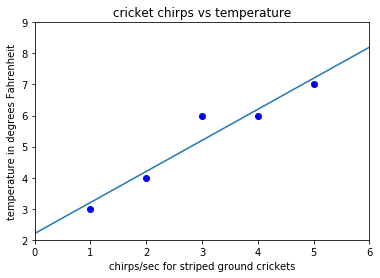

In [105]:
xx = np.linspace(0, 6, 10)
plt.scatter(x, y, marker='o', c='b')
plt.plot(xx,h(theta[0],theta[1],xx))
plt.xlim([0,6])
plt.ylim([2,9])
plt.title('cricket chirps vs temperature')
plt.xlabel('chirps/sec for striped ground crickets')
plt.ylabel('temperature in degrees Fahrenheit')
plt.show()

In [107]:
number_of_points = 10
x_points = np.linspace(1, 3, number_of_points)
y_points = np.linspace(0.5, 1.5, number_of_points)
theta_0s, theta_1s = np.meshgrid(x_points, y_points)
costs = np.array([J(x, y, theta_0, theta_1) for theta_0, theta_1 in zip(theta_0s, theta_1s)])


### Visualising the relationship between Cost and theta parameters

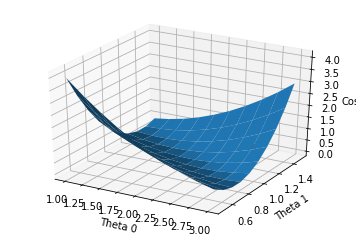

In [125]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


a = J(x, y, 2.75, 1.2)

ax.plot_surface(theta_0s, theta_1s, costs)
ax.scatter(2.75, 1.2, a, c='r', marker='o', zorder=1)

ax.set_xlabel('Theta 0')
ax.set_ylabel('Theta 1')
ax.set_zlabel('Cost')

plt.show()

In [119]:
actualvalues = stats.linregress(x,y)
print ("Actual values for theta are:")
print ("theta_0 =", actualvalues.intercept)
print ("theta_1 =", actualvalues.slope)
a

Actual values for theta are:
theta_0 = 2.2
theta_1 = 1.0


0.78125